<a href="https://colab.research.google.com/github/BiharaCD/MLOM/blob/main/PGGAN-test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces(shuffle=True, download_if_missing=True)
images = data.images  # shape (400, 64, 64)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces(shuffle=True, download_if_missing=True)
images = data.images  # shape (400, 64, 64)


In [4]:
images = images[:, np.newaxis, :, :]   # shape: (400, 1, 64, 64)
images = torch.tensor(images, dtype=torch.float32)
images = (images - 0.5) * 2   # scale to [-1, 1]

dataset = TensorDataset(images)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [5]:
# Generator
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 64*64),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(z.size(0), 1, 64, 64)
        return img

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*64, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)


In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"

gen = Generator().to(device)
disc = Discriminator().to(device)

criterion = nn.BCELoss()
opt_gen = optim.Adam(gen.parameters(), lr=0.0002)
opt_disc = optim.Adam(disc.parameters(), lr=0.0002)


Epoch 1/50 | Loss D: 0.4959, Loss G: 0.6211
Epoch 2/50 | Loss D: 0.7873, Loss G: 0.5538
Epoch 3/50 | Loss D: 0.3060, Loss G: 2.2977
Epoch 4/50 | Loss D: 0.0714, Loss G: 3.2866
Epoch 5/50 | Loss D: 0.1219, Loss G: 2.6142
Epoch 6/50 | Loss D: 0.1054, Loss G: 2.3962
Epoch 7/50 | Loss D: 0.1033, Loss G: 2.4061
Epoch 8/50 | Loss D: 0.0673, Loss G: 2.6960
Epoch 9/50 | Loss D: 0.0726, Loss G: 2.7193
Epoch 10/50 | Loss D: 0.0428, Loss G: 3.1999


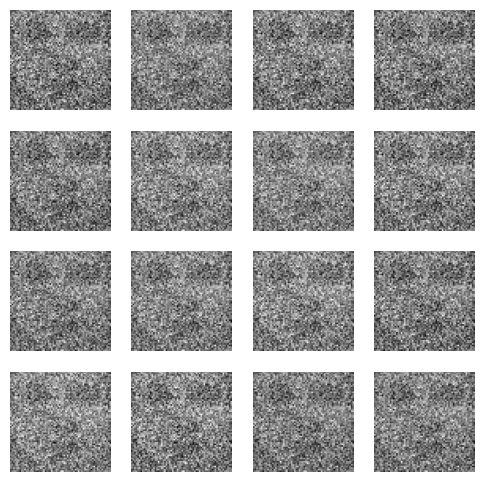

Epoch 11/50 | Loss D: 0.0803, Loss G: 3.2726
Epoch 12/50 | Loss D: 0.0747, Loss G: 3.7254
Epoch 13/50 | Loss D: 0.0245, Loss G: 5.0456
Epoch 14/50 | Loss D: 0.0269, Loss G: 6.1790
Epoch 15/50 | Loss D: 0.0154, Loss G: 7.0995
Epoch 16/50 | Loss D: 0.0048, Loss G: 7.5019
Epoch 17/50 | Loss D: 0.0081, Loss G: 7.6630
Epoch 18/50 | Loss D: 0.0141, Loss G: 7.4421
Epoch 19/50 | Loss D: 0.0093, Loss G: 6.7300
Epoch 20/50 | Loss D: 0.0069, Loss G: 7.2451


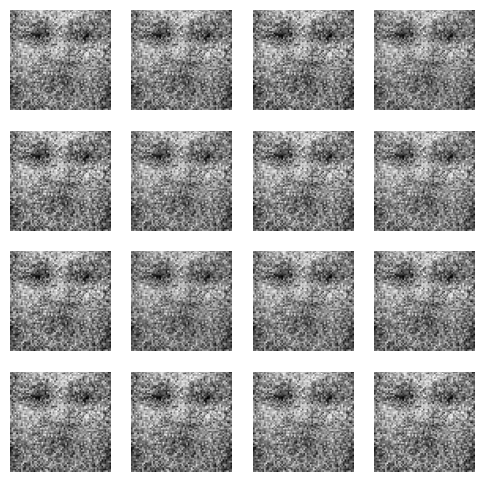

Epoch 21/50 | Loss D: 0.0069, Loss G: 7.6052
Epoch 22/50 | Loss D: 0.0111, Loss G: 7.0661
Epoch 23/50 | Loss D: 0.0114, Loss G: 7.7085
Epoch 24/50 | Loss D: 0.0095, Loss G: 9.3179
Epoch 25/50 | Loss D: 0.0066, Loss G: 9.8535
Epoch 26/50 | Loss D: 0.0239, Loss G: 10.8564
Epoch 27/50 | Loss D: 0.0021, Loss G: 9.7542
Epoch 28/50 | Loss D: 0.0067, Loss G: 9.5289
Epoch 29/50 | Loss D: 0.0152, Loss G: 13.3769
Epoch 30/50 | Loss D: 0.0037, Loss G: 12.9909


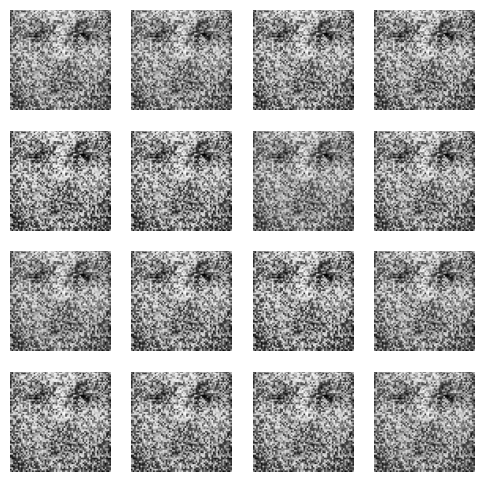

Epoch 31/50 | Loss D: 0.0014, Loss G: 10.0065
Epoch 32/50 | Loss D: 0.0007, Loss G: 12.1068
Epoch 33/50 | Loss D: 0.0060, Loss G: 16.9766
Epoch 34/50 | Loss D: 0.0014, Loss G: 12.0009
Epoch 35/50 | Loss D: 0.0014, Loss G: 15.2006
Epoch 36/50 | Loss D: 0.0046, Loss G: 11.5147
Epoch 37/50 | Loss D: 0.0062, Loss G: 11.5882
Epoch 38/50 | Loss D: 0.0020, Loss G: 12.2561
Epoch 39/50 | Loss D: 0.0017, Loss G: 13.0336
Epoch 40/50 | Loss D: 0.0078, Loss G: 12.7708


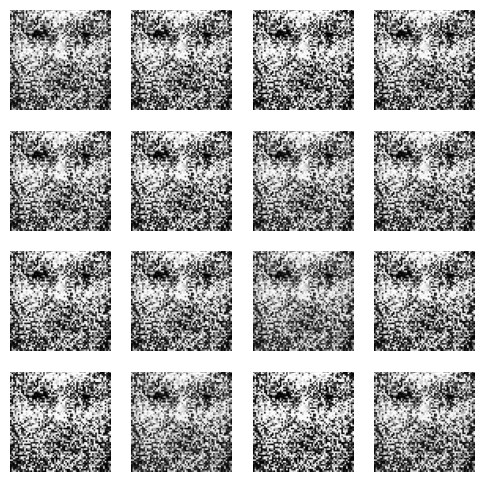

Epoch 41/50 | Loss D: 0.0014, Loss G: 12.8565
Epoch 42/50 | Loss D: 0.0021, Loss G: 16.0247
Epoch 43/50 | Loss D: 0.0018, Loss G: 10.9905
Epoch 44/50 | Loss D: 0.0032, Loss G: 12.5083
Epoch 45/50 | Loss D: 0.0069, Loss G: 18.2867
Epoch 46/50 | Loss D: 0.0012, Loss G: 14.9671
Epoch 47/50 | Loss D: 0.0013, Loss G: 12.4718
Epoch 48/50 | Loss D: 0.0014, Loss G: 9.7685
Epoch 49/50 | Loss D: 0.0014, Loss G: 12.7663
Epoch 50/50 | Loss D: 0.0013, Loss G: 12.3982


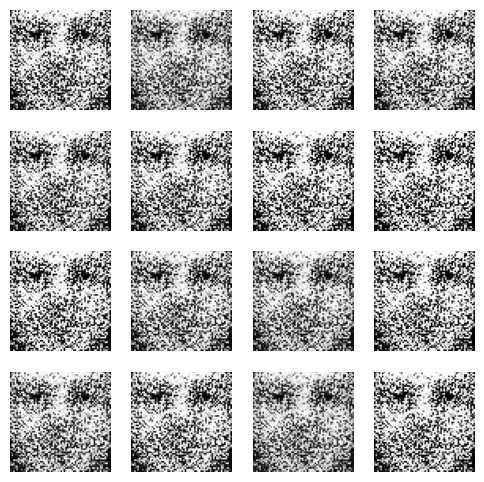

In [7]:
epochs = 50
latent_dim = 100

for epoch in range(epochs):
    for batch in dataloader:
        real_imgs = batch[0].to(device)
        batch_size = real_imgs.size(0)

        # Labels
        real = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = gen(z)

        loss_real = criterion(disc(real_imgs), real)
        loss_fake = criterion(disc(fake_imgs.detach()), fake)
        loss_disc = (loss_real + loss_fake) / 2

        opt_disc.zero_grad()
        loss_disc.backward()
        opt_disc.step()

        # Train Generator
        loss_gen = criterion(disc(fake_imgs), real)

        opt_gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()

    print(f"Epoch {epoch+1}/{epochs} | Loss D: {loss_disc:.4f}, Loss G: {loss_gen:.4f}")

    # Show some results every 10 epochs
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(16, latent_dim).to(device)
            samples = gen(z).cpu().numpy()
            fig, axes = plt.subplots(4, 4, figsize=(6,6))
            for i, ax in enumerate(axes.flatten()):
                ax.imshow(samples[i][0], cmap="gray")
                ax.axis("off")
            plt.show()
